# Разработка модели для определения региона с наибольшей прибыльностью добычи нефти

# Описание проекта

Построение модели машинного обучения для определения региона с наибольшей прибыльностью добычи нефти может помочь оптимизировать инвестиционные решения и увеличить рентабельность добычи нефти. Правильное использование машинного обучения позволит предсказывать прибыльность добычи нефти с большей точностью и с учетом всех релевантных факторов.

В добывающей компании «Лукойл» нужно решить, где бурить новую скважину.
Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Условия заказчика для решения задачи

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

# Описание данных

- `/datasets/geo_data_0.csv`
- `/datasets/geo_data_1.csv`
- `/datasets/geo_data_2.csv`
- `id` — уникальный идентификатор скважины;
- `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

# План работы 

**Шаг 1. Загрузка и подготовка данных**

Загрузить и подготовить данные.

**Шаг 2. Обучение и проверка модели**

Обучить и проверить модель для каждого региона:
- Разбить данные на обучающую и валидационную выборки в соотношении 75:25.
- Обучить модель и сделать предсказания на валидационной выборке.
- Сохранить предсказания и правильные ответы на валидационной выборке.
- Напечатать на экране средний запас предсказанного сырья и RMSE модели.
- Проанализировать результаты.

**Шаг 3. Подготовка к расчёту прибыли**

1. Подготовить данные к расчёту прибыли:
- Все ключевые значения для расчётов сохранить в отдельных переменных.
- Рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Сравнить полученный объём сырья со средним запасом в каждом регионе. 
- Написать выводы по этапу подготовки расчёта прибыли.

2. Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- Выбрать скважины с максимальными значениями предсказаний. 
- Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитать прибыль для полученного объёма сырья.

**Шаг 4. Расчёт прибыли и рисков**

Посчитать риски и прибыль для каждого региона:
- Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Написать выводы: предложить регион для разработки скважин и обосновать выбор.

**Шаг 5. Оформление выводов**


## Загрузка и подготовка данных

На данном шаге нам необходимо загрузить необходимые библиотеки, загрузить, ознакомится с данными и выполнить подготовку данных.

### Импортируем необходимые библиотеки

In [1]:
!pip install -q -U scikit-learn
!pip install -q phik

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
import phik

import warnings
warnings.filterwarnings('ignore')

# Задаем константы
RANDOM_STATE = 12345
TEST_SIZE = 0.25

# загружаем нужные модели
from sklearn.linear_model import LinearRegression

# загружаем функцию для разделения данных на выборки
from sklearn.model_selection import train_test_split

# импортируем функции для работы с метриками
from sklearn.metrics import mean_squared_error, r2_score


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Загрузим данные в датафреймы pandas.

In [2]:
try:
    data_0 = pd.read_csv('geo_data_0.csv', decimal=",")
    data_1 = pd.read_csv('geo_data_1.csv', decimal=",")
    data_2 = pd.read_csv('geo_data_2.csv', decimal=",")
except:
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv', encoding='utf8', decimal=",")
    data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv', encoding='utf8', decimal=",")
    data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv', encoding='utf8', decimal=",")

### Ознакомимся с данными

In [3]:
display(data_0.head(3))
data_0.info()
print('Количество явных дубликатов в датасете data_0:', data_0.duplicated().sum())

,id,f0,f1,f2,product
0,txEyH,0.7057449842080644,-0.4978225001976334,1.22116994843607,105.28006184349583
1,2acmU,1.3347112926051892,-0.3401642528583136,4.3650803324282,73.03775026515737
2,409Wp,1.0227322634721168,0.15199044457022945,1.4199262386740652,85.26564713099945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  object
 1   f0       100000 non-null  object
 2   f1       100000 non-null  object
 3   f2       100000 non-null  object
 4   product  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
Количество явных дубликатов в датасете data_0: 0


In [4]:
display(data_1.head(3))
data_1.info()
print('Количество явных дубликатов в датасете data_1:', data_1.duplicated().sum())

,id,f0,f1,f2,product
0,kBEdx,-15.00134818249185,-8.275999947188001,-0.005876013693320655,3.179102583207246
1,62mP7,14.272087811011147,-3.47508321506002,0.9991827365665829,26.95326103153969
2,vyE1P,6.263187352448809,-5.948385788285711,5.001160160764809,134.76630515769844


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  object
 1   f0       100000 non-null  object
 2   f1       100000 non-null  object
 3   f2       100000 non-null  object
 4   product  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
Количество явных дубликатов в датасете data_1: 0


In [5]:
display(data_2.head(3))
data_2.info()
print('Количество явных дубликатов в датасете data_2:', data_2.duplicated().sum())

,id,f0,f1,f2,product
0,fwXo0,-1.1469870984179529,0.9633279217162892,-0.8289649221710994,27.758673230730036
1,WJtFt,0.2627779016539684,0.2698389572803021,-2.530186515492004,56.06969663239464
2,ovLUW,0.19458728165865746,0.2890350017576741,-5.586432770903118,62.87191004763475


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  object
 1   f0       100000 non-null  object
 2   f1       100000 non-null  object
 3   f2       100000 non-null  object
 4   product  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
Количество явных дубликатов в датасете data_2: 0


На этапе ознакомления с данными выявлены неправильные типы у данных.

#### Преобразуем данные в нужные типы

In [6]:
for i in data_0[['f0', 'f1', 'f2', 'product']]:
    data_0[i] = data_0[i].astype('float64')

In [7]:
for i in data_1[['f0', 'f1', 'f2', 'product']]:
    data_1[i] = data_1[i].astype('float64')

In [8]:
for i in data_2[['f0', 'f1', 'f2', 'product']]:
    data_2[i] = data_2[i].astype('float64')

Данные с плавающей точкой типа object были заменены на данные с плавающей точкой типа float64.

#### Посмотрим на распределение данных

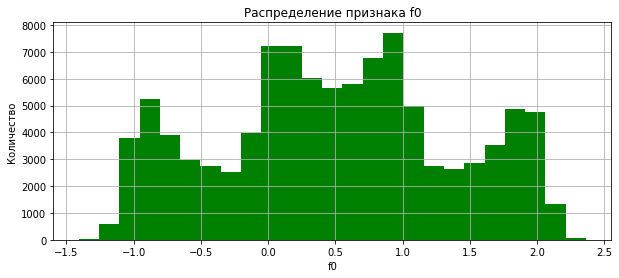

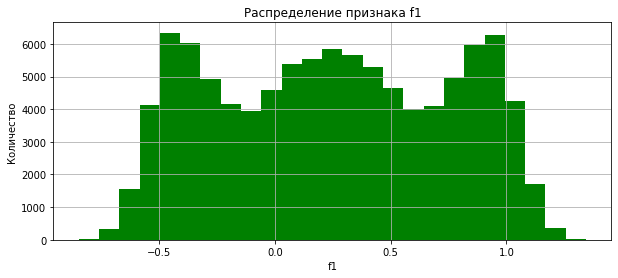

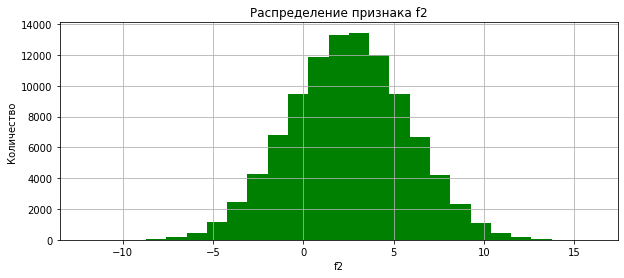

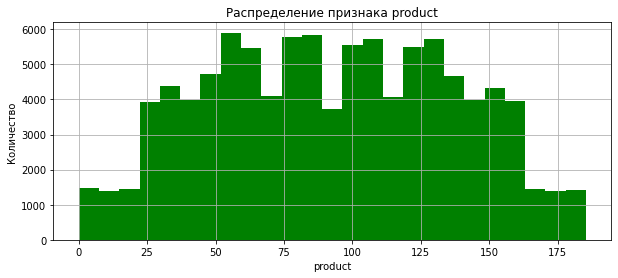

In [9]:
for i in data_0[['f0', 'f1', 'f2', 'product']]:
    data_0[i].plot(kind='hist', grid=True, title= f'Распределение признака {i}', bins=25, color='green', figsize=(10,4));
    plt.xlabel(i)
    plt.ylabel('Количество')
    plt.show()

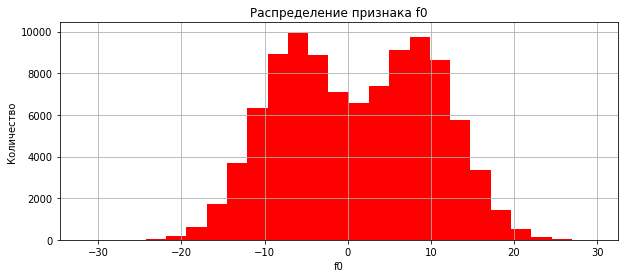

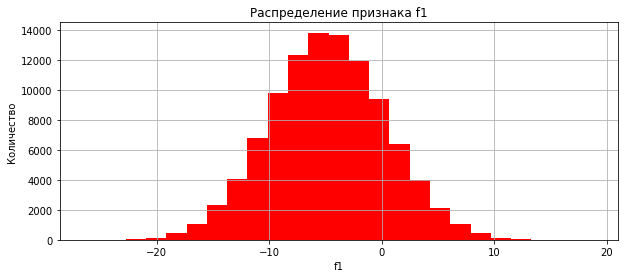

In [10]:
for i in data_1[['f0', 'f1']]:
    data_1[i].plot(kind='hist', grid=True, title= f'Распределение признака {i}', bins=25, color='red', figsize=(10,4));
    plt.xlabel(i)
    plt.ylabel('Количество')
    plt.show()

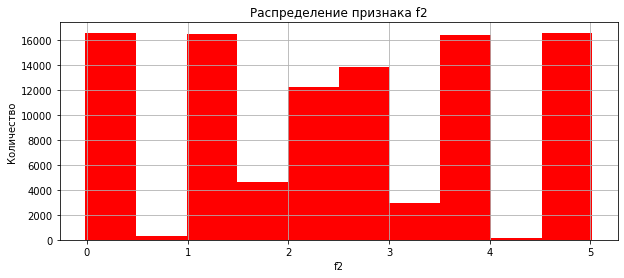

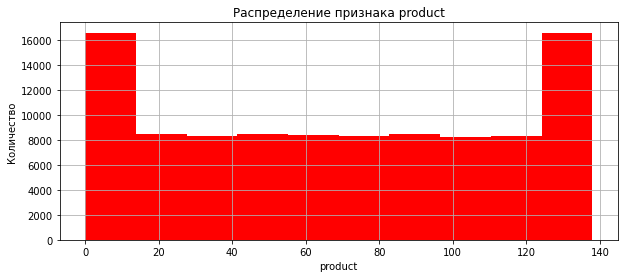

In [11]:
for i in data_1[['f2', 'product']]:
    data_1[i].plot(kind='hist', grid=True, title= f'Распределение признака {i}', bins=10, color='red', figsize=(10,4));
    plt.xlabel(i)
    plt.ylabel('Количество')
    plt.show()

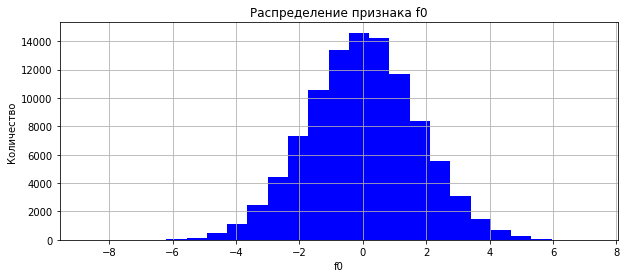

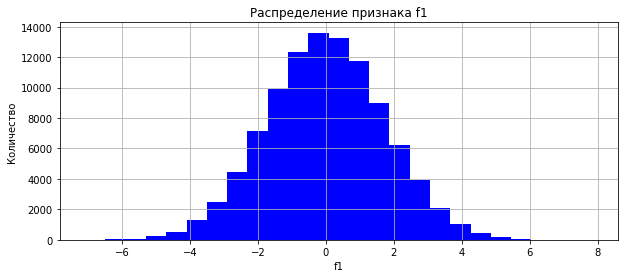

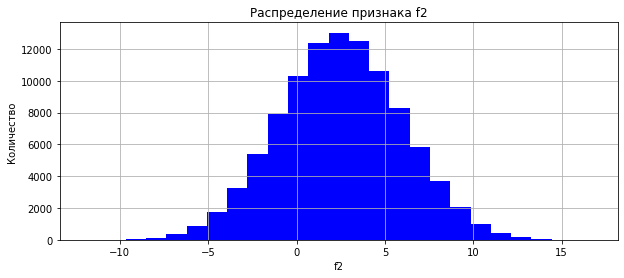

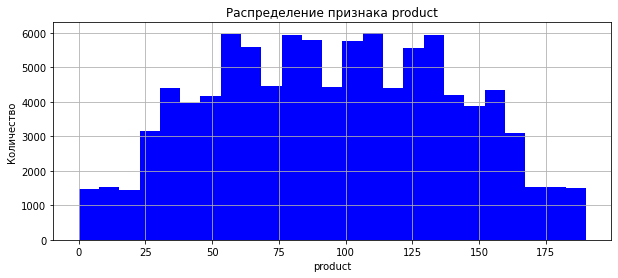

In [12]:
for i in data_2[['f0', 'f1', 'f2', 'product']]:
    data_2[i].plot(kind='hist', grid=True, title= f'Распределение признака {i}', bins=25, color='blue', figsize=(10,4));
    plt.xlabel(i)
    plt.ylabel('Количество')
    plt.show()

По графикам распределения признаков, можно сказать, что большинство признаков распределены симметрично.

#### Проверим данные на наличие выбросов и аномалий

Построим таблицу описательной статистики признаков датасета `data_0`

In [13]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Построим график "ящики с усами", который покажет выбросы и основные статистики данных (квартили)

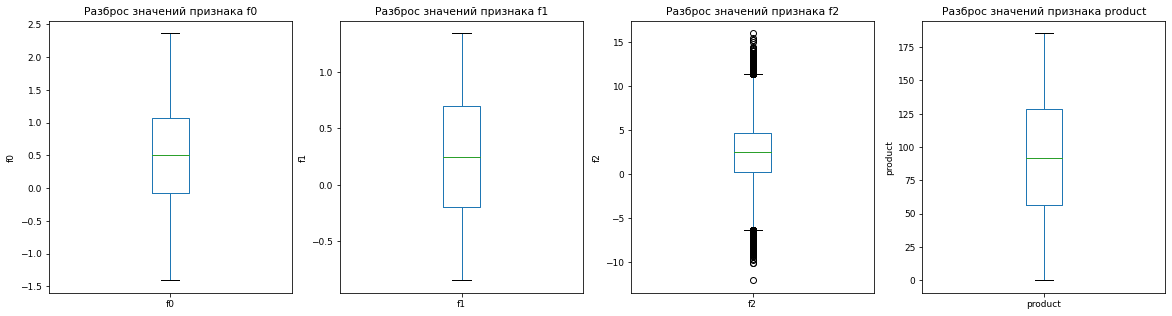

In [14]:
plt.rcParams.update({'font.size': 9})
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
axes[0].set_title('Разброс значений признака f0')
axes[0].set_ylabel('f0')
data_0['f0'].plot(kind='box', ax=axes[0])

axes[1].set_title('Разброс значений признака f1')
axes[1].set_ylabel('f1')
data_0['f1'].plot(kind='box', ax=axes[1])

axes[2].set_title('Разброс значений признака f2')
axes[2].set_ylabel('f2')
data_0['f2'].plot(kind='box', ax=axes[2])

axes[3].set_title('Разброс значений признака product')
axes[3].set_ylabel('product')
data_0['product'].plot(kind='box', ax=axes[3])
plt.show();

По таблице и графикам можно сказать, что признак f2 распределен не равномерно, имеются выбросы как в большую, так и в меньшую стороны.

Построим таблицу описательной статистики признаков датасета `data_1`

In [15]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Построим график "ящики с усами", который покажет выбросы и основные статистики данных (квартили)

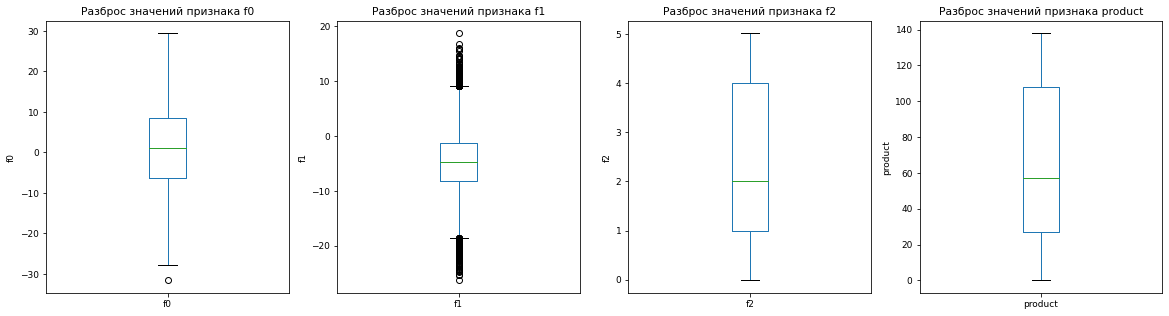

In [16]:
plt.rcParams.update({'font.size': 9})
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
axes[0].set_title('Разброс значений признака f0')
axes[0].set_ylabel('f0')
data_1['f0'].plot(kind='box', ax=axes[0])

axes[1].set_title('Разброс значений признака f1')
axes[1].set_ylabel('f1')
data_1['f1'].plot(kind='box', ax=axes[1])

axes[2].set_title('Разброс значений признака f2')
axes[2].set_ylabel('f2')
data_1['f2'].plot(kind='box', ax=axes[2])

axes[3].set_title('Разброс значений признака product')
axes[3].set_ylabel('product')
data_1['product'].plot(kind='box', ax=axes[3])
plt.show();

По  таблице и графикам можно сказать, что признак f1 распределен не равномерно, имеются выбросы как в большую, так и в меньшую стороны.

Построим таблицу описательной статистики признаков датасета `data_2`

In [17]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Построим график "ящики с усами", который покажет выбросы и основные статистики данных (квартили)

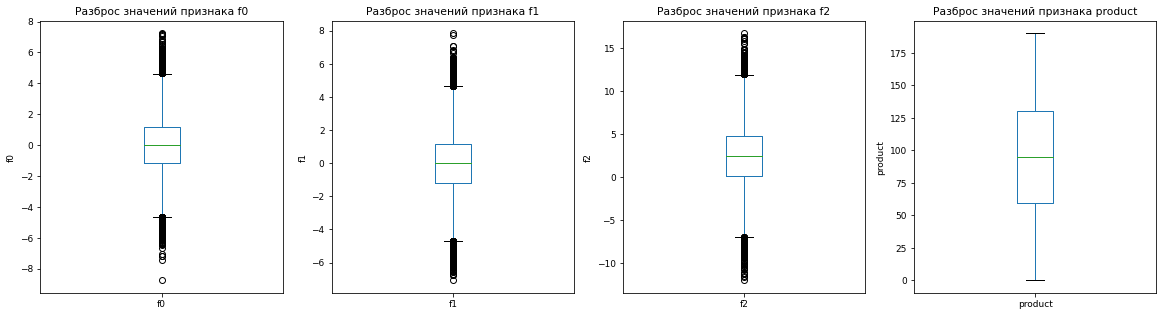

In [18]:
plt.rcParams.update({'font.size': 9})
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
axes[0].set_title('Разброс значений признака f0')
axes[0].set_ylabel('f0')
data_2['f0'].plot(kind='box', ax=axes[0])

axes[1].set_title('Разброс значений признака f1')
axes[1].set_ylabel('f1')
data_2['f1'].plot(kind='box', ax=axes[1])

axes[2].set_title('Разброс значений признака f2')
axes[2].set_ylabel('f2')
data_2['f2'].plot(kind='box', ax=axes[2])

axes[3].set_title('Разброс значений признака product')
axes[3].set_ylabel('product')
data_2['product'].plot(kind='box', ax=axes[3])
plt.show();

По  таблице и графикам можно сказать, что признаки f0, f1, f2 распределены не равномерно, имеются выбросы как в большую, так и в меньшую стороны.

На данном этапе с выбросами в данных делать ничего не будем, оставим все как есть. Скорее всего, есть необходимость обучить в дальнейшем модели с данными выбросами, чтобы предсказания были более точными с учетом выбросов.

#### Посмотрим на взаимосвязь данных

Выполним анализ корреляции датасета `data_0`

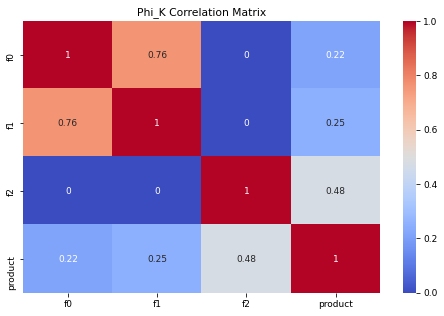

In [19]:
corr_matrix = data_0.drop(['id'], axis =1).phik_matrix(interval_cols=['f0', 'f1', 'f2', 'product'])

# Визуализируем матрицу корреляции
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Согласно получившейся матрицы корреляции следует, что высокая прямая связь наблюдается у признаков:
- `f0` и `f1`.

Выполним анализ корреляции датасета `data_1`

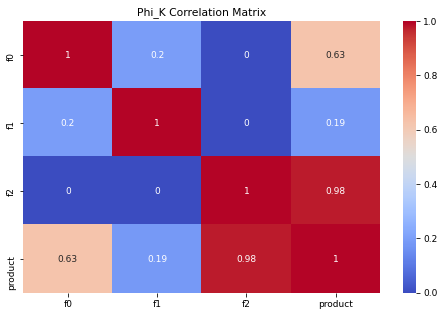

In [20]:
corr_matrix = data_1.drop(['id'], axis =1).phik_matrix(interval_cols=['f0', 'f1', 'f2', 'product'])

# Визуализируем матрицу корреляции
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Согласно получившейся матрицы корреляции следует, что заметная прямая связь наблюдается у признаков:
- `f0` и `product`.

Весьма высокая взаимосвязь наблюдается у признаков:
- `f2` и `product`.

Выполним анализ корреляции датасета `data_2`

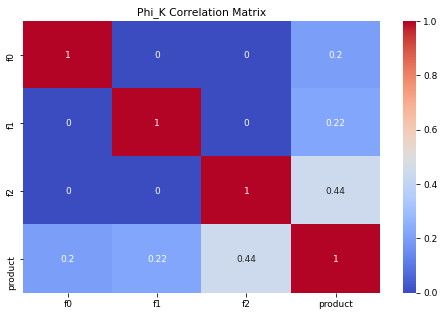

In [21]:
corr_matrix = data_2.drop(['id'], axis =1).phik_matrix(interval_cols=['f0', 'f1', 'f2', 'product'])

# Визуализируем матрицу корреляции
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Согласно получившейся матрицы корреляции следует, что наблюдается слабая и умеренная взаимосвязь у признаков.

### Выводы по анализу данных

По итогам ознакомления с данными следует следующее:

- На этапе ознакомления с данными выявлены неправильные типы у данных. 
- По графикам распределения признаков, можно сказать, что большинство признаков распределены симметрично.
- По таблице и графикам можно сказать, что данные распределены не равномерно, имеются выбросы как в большую, так и в меньшую стороны.
- Согласно матрицам корреляции прослеживаются между некоторыми признаками умеренная, высокая и весьма высокая прямые связи.

### Выполним подготовку данных

Переведем столбец `id` в индекс, так как для обучения данный столбец не несет значимости

In [22]:
data_0 = data_0.set_index('id')

In [23]:
print(f' Количество дубликатов в "data_0" после индексации "id": {data_0.duplicated().sum()}')

 Количество дубликатов в "data_0" после индексации "id": 0


In [24]:
data_1 = data_1.set_index('id')

In [25]:
print(f' Количество дубликатов в "data_1" после индексации "id": {data_1.duplicated().sum()}')

 Количество дубликатов в "data_1" после индексации "id": 0


In [26]:
data_2 = data_2.set_index('id')

In [27]:
print(f' Количество дубликатов в "data_2" после индексации "id": {data_2.duplicated().sum()}')

 Количество дубликатов в "data_2" после индексации "id": 0


### Выводы по предобработке данных

По итогам предобработке данных:
- Проверили пропуски в данных.
- Проверили данные на явные дубликаты.
- Данные с плавающей точкой типа object были заменены на данные с плавающей точкой типа float64.

## Обучение и проверка модели

На данном этапе необходимо обучить и проверить модель для каждого региона

In [28]:
# Создадим список предсказаний по объёму сырья в скважине на валидационной выборке
predictions_valid = []
# Создадим список правильных ответов на тренировочной выборке
train_target = []
# Создадим список правильных ответов на валидационной выборке
valid_target = []
# Создадим список предсказаний со средним значением объёма запасов в скважине на валидационной выборке
predictions_mean = []

In [29]:
# Создадим функцию для обучения модели и предсказания данных
def learning_prediction(data):
    features = data.drop(['product'], axis = 1)
    target = data['product']
    # Разделим данные на выборки
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size = TEST_SIZE, 
                                                                                  random_state = RANDOM_STATE)
    # Обучим данные
    model = LinearRegression()
    model.fit(features_train, target_train)
                                                                                  
    # Сделаем предсказания на обученных данных 
    predictions = model.predict(features_valid)
    
    # Список предсказаний по объёму запасов в скважине на валидационной выборке
    predictions_valid.append(predictions)
    # Cписок правильных ответов на тренировочной выборке
    train_target.append(target_train.reset_index(drop=True))
    # Cписок правильных ответов на валидационной выборке
    valid_target.append(target_valid.reset_index(drop=True))
    # Cписок предсказаний со средним значением объёма запасов в скважине на валидационной выборке
    predictions_mean.append(predictions.mean())
    
    # Выведем значения со средним значением предсказанного объёма запасов в скважине для трех датасетов 
    print(f'Cреднее значение предсказанного объёма запасов в скважине: {round(predictions.mean(),2)} тыс. баррелей')
    # Выведем значения метрики MSE модели для трех датасетов 
    print(f'Значения метрики R2 модели: {round(r2_score(target_valid, predictions),2)}')
    # Выведем значения метрики RMSE модели для трех датасетов 
    print(f'Значения метрики RMSE модели: {round(mean_squared_error(target_valid, predictions, squared=False),2)}')

print('Датасет "data_0" (Регион 1):')    
learning_prediction(data_0)
print(' ')
print('Датасет "data_1" (Регион 2):')    
learning_prediction(data_1)
print(' ')
print('Датасет "data_2" (Регион 3):')    
learning_prediction(data_2)

Датасет "data_0" (Регион 1):
Cреднее значение предсказанного объёма запасов в скважине: 92.59 тыс. баррелей
Значения метрики R2 модели: 0.28
Значения метрики RMSE модели: 37.58
 
Датасет "data_1" (Регион 2):
Cреднее значение предсказанного объёма запасов в скважине: 68.73 тыс. баррелей
Значения метрики R2 модели: 1.0
Значения метрики RMSE модели: 0.89
 
Датасет "data_2" (Регион 3):
Cреднее значение предсказанного объёма запасов в скважине: 94.97 тыс. баррелей
Значения метрики R2 модели: 0.21
Значения метрики RMSE модели: 40.03


### Выводы по обучению моделей

По результатам предсказанных значений и полученных метрик, можно сделать следующие  выводы:
- Cредние значения предсказанного объёма запасов в скважине в первом и третьем регионе значительно выше, чем во втором регионе.
- По метрике RMSE заметны высокие значения в первом и третьем регионе, по сравнению со вторым регионом, это говорит о том, что в данных двух регионах достаточно большой разброс данных.
- По метрике R2, можно сказать, что предсказание модели во втором регионе более точное по сравнению со средним значением целевого признака, чем предсказание в первом и третьем регионе. Это, возможно, связанно также из-за достаточно большого разброса данных в этих двух регионах.

## Подготовка к расчёту прибыли

На данном этапе необходимо подготовить данные к расчету прибыли

### Ключевые значения для расчётов сохраним в отдельных переменных

In [30]:
# При разведке региона исследуют 500 точек:
POINTS = 500
# С помощью машинного обучения выбирают 200 лучших для разработки:
BEST_POINTS = 200
# Бюджет на разработку скважин в регионе — 10 млрд рублей:
BUDGET = 1e07
# Доход с каждой единицы продукта составляет 450 тыс. рублей:
INCOME_UNIT = 450

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [31]:
# Средний достаточный объём сырья для безубыточной разработки новой скважины
sufficient_volume = round(BUDGET/(BEST_POINTS*INCOME_UNIT), 2)
print(f'Средний достаточный объём сырья для безубыточной разработки новой скважины: {sufficient_volume} тыс. баррелей')

Средний достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей


Исходя из получившегося значения, можно сказать, что минимум 111,11 тыс. баррелей необходимо, чтобы отбить себестоимость разработки. 

### Сравним полученный объём сырья со средним запасом в каждом регионе 

In [32]:
comparison = pd.DataFrame(columns=['регион', 'предсказанный_объём_сырья', 'достаточный_объём_сырья'])
for i in range(3):
    comparison.loc[len(comparison)] = [f'Регион_{i+1}', 
                                       round(predictions_valid[i].mean(), 2),
                                       sufficient_volume]
display(comparison)

,регион,предсказанный_объём_сырья,достаточный_объём_сырья
0,Регион_1,92.59,111.11
1,Регион_2,68.73,111.11
2,Регион_3,94.97,111.11


Выше предсказанные средние значения объемов сырья меньше данного показателя. Необходимо выбрать из всех скважин 200 наиболее выгодных точек с лучшими значениями объемов сырья.

### Выводы по подготовке к расчёту прибыли

По итогам подготовке к расчёту прибыли:
- Исходя из получившегося значения, можно сказать, что минимум 111,11 тыс. баррелей необходимо, чтобы отбить себестоимость разработки.
- Выше предсказанные средние значения объемов сырья меньше данного показателя. Необходимо выбрать из всех скважин 200 наиболее выгодных точек с лучшими значениями объемов сырья.

### Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

На данном этапе необходимо:
- Выбрать скважины с максимальными значениями предсказаний.
- Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитать прибыль для полученного объёма сырья.

In [33]:
# Создадим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели
def profit_calculation(target, predictions):
    max_predictions = predictions.sort_values(ascending=False)
    target_best_points = target[max_predictions.index][:BEST_POINTS]
    return target_best_points.sum() * INCOME_UNIT - BUDGET

In [34]:
# Рассчитаем прибыль для полученного объёма сырья по лучшим 200 точкам
result_profit = pd.DataFrame(columns=['регион', 'прибыль_млрд_рублей'])
for i in range(3):
    predictions_200 = pd.Series(predictions_valid[i])
    profit_200 = profit_calculation(valid_target[i], predictions_200)
    result_profit.loc[len(result_profit.index)] = [f'Регион_{i+1}', profit_200/1000000]
display(result_profit)

,регион,прибыль_млрд_рублей
0,Регион_1,3.320826
1,Регион_2,2.415087
2,Регион_3,2.710350


По итогам расчета прибыли для полученного объёма сырья трех регионов, можно сказать, что все три региона имеют прибыльное положение. Меньше всего прибыли у второго региона.

## Расчёт прибыли и рисков 

На данном этапе необходимо применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли, найти среднюю прибыль, 95%-й доверительный интервал и риск убытков, предложить регион для разработки скважин.

In [35]:
result = pd.DataFrame(columns=['регион', 
                               'средняя_прибыль_млрд_рублей',
                               '95%-й_доверительный_интервал_млрд_рублей',
                               'риск_убытков_%'])

risk = []
state = np.random.RandomState(12345)
bootstrap_samples = 1000

In [36]:
for i in range(3):
    predictions = predictions_valid[i]
    target = valid_target[i]
    profit = []
    # Применение техники Bootstrap с 1000 выборокам
    for j in range(bootstrap_samples):
        target_500 = target.sample(POINTS, replace=True, random_state = state)
        predictions_500 = predictions[target_500.index]
        
        target_500 = target_500.reset_index(drop=True)
        predictions_500 = pd.Series(predictions_500).reset_index(drop = True)
        profit.append(profit_calculation(target_500, predictions_500))
    
    profit = pd.Series(profit)
    mean_profit = round(profit.mean(), 2)
    confidence_interval = (f'от {round(profit.quantile(0.025)/1000000, 2)} до {round(profit.quantile(0.975)/1000000, 2)}')
    risk_losses = round((profit<0).mean()*100, 2)
    risk.append(risk_losses)
    
    result.loc[len(result)] = [f'Регион_{i+1}', mean_profit/1000000, confidence_interval, risk_losses]
display(result)

,регион,средняя_прибыль_млрд_рублей,95%-й_доверительный_интервал_млрд_рублей,риск_убытков_%
0,Регион_1,0.396165,от -0.11 до 0.91,6.9
1,Регион_2,0.461156,от 0.08 до 0.86,0.7
2,Регион_3,0.392950,от -0.11 до 0.93,6.5


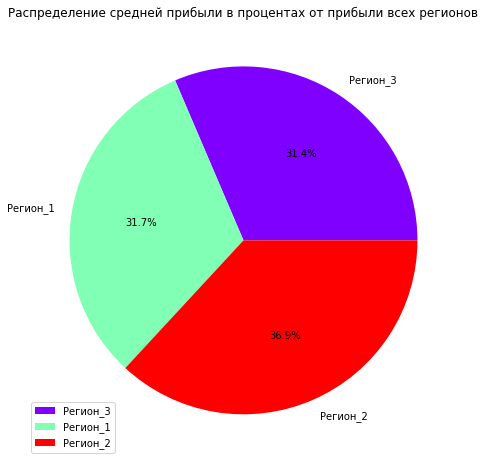

In [37]:
plt.rcParams.update({'font.size': 10})
profit_plot = result.pivot_table(
    index='регион', 
    values='средняя_прибыль_млрд_рублей').sort_values('средняя_прибыль_млрд_рублей').plot(kind='pie',
                                                y='средняя_прибыль_млрд_рублей',
                                                ylabel='',                                           
                                                title = 'Распределение средней прибыли в процентах от прибыли всех регионов', 
                                                autopct='%1.1f%%',
                                                colormap="rainbow",
                                                figsize=(8,8))
plt.legend(loc=3)
plt.show()

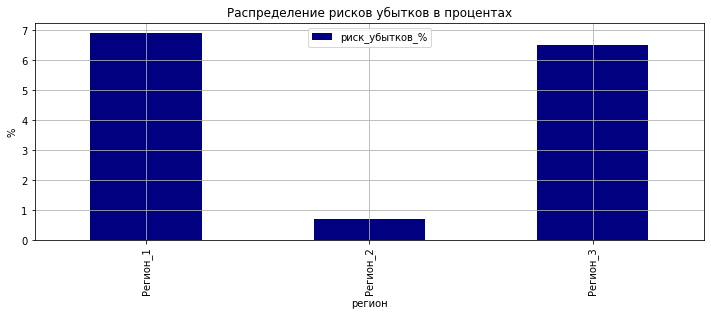

In [38]:
plt.rcParams.update({'font.size': 10})
result.plot(x = 'регион', 
            y = 'риск_убытков_%', 
            kind='bar', 
            grid=True, 
            title='Распределение рисков убытков в процентах', 
            colormap="jet", 
            figsize=(12,4));
plt.ylabel('%')
plt.show()

### Выводы по расчетам рисков и прибыли для каждого региона

По получившейся таблице с результатами расчета рисков и прибыли для каждого региона и графиках , можно сделать следующие выводы:
- Средняя прибыль у регионов 1 и 3 примерно одинакова и ниже средней прибыли региона 2.
- Доверительный интервал у регионов 1 и 3 примерно одинаков и  с учетом отрицательного значения ниже доверительного интервала у региона 2.
- Риск убытков у регионов 1 и 3 больше 2.5%, у региона 2 - 0.7%, что меньше 2.5%.

**Исходя из выводов, по анализу средней прибыли, доверительного интервала и риска убытков, наиболее прибыльный регион для разработки месторождения с меньшими рисками - регион 2.**

## Оформление выводов

**По итогам ознакомления с данными следует следующее:**
- На этапе ознакомления с данными выявлены неправильные типы у данных. 
- По графикам распределения признаков, можно сказать, что большинство признаков распределены симметрично.
- По таблице и графикам можно сказать, что данные распределены не равномерно, имеются выбросы как в большую, так и в меньшую стороны.
- Согласно матрицам корреляции прослеживаются между некоторыми признаками умеренная, высокая и весьма высокая прямые связи.

**По итогам предобработке данных:**
- Проверили пропуски в данных.
- Проверили данные на явные дубликаты.
- Данные с плавающей точкой типа object были заменены на данные с плавающей точкой типа float64.

**По результатам предсказанных значений и полученных метрик, можно сделать следующие выводы:**
- Средние значения предсказанного объёма запасов в скважине в первом и третьем регионе значительно выше, чем во втором регионе.
- По метрике RMSE заметны высокие значения в первом и третьем регионе, по сравнению со вторым регионом, это говорит о том, что в данных двух регионах достаточно большой разброс данных.
- По метрике R2, можно сказать, что предсказание модели во втором регионе более точное по сравнению со средним значением целевого признака, чем предсказание в первом и третьем регионе. Это, возможно, связанно также из-за достаточно большого разброса данных в этих двух регионах.

**По итогам подготовке к расчёту прибыли:**
- Исходя из получившегося значения, можно сказать, что минимум 111,11 тыс. баррелей необходимо, чтобы отбить себестоимость разработки.
- Выше предсказанные средние значения объемов сырья меньше данного показателя. Необходимо выбрать из всех скважин 200 наиболее выгодных точек с лучшими значениями объемов сырья.

По итогам расчета прибыли для полученного объёма сырья трех регионов, можно сказать, что все три региона имеют прибыльное положение. Меньше всего прибыли у второго региона.

**По получившейся таблице с результатами расчета рисков и прибыли для каждого региона и графиках, можно сделать следующие выводы:**
- Средняя прибыль у регионов 1 и 3 примерно одинакова и ниже средней прибыли региона 2.
- Доверительный интервал у регионов 1 и 3 примерно одинаков и  с учетом отрицательного значения ниже доверительного интервала у региона 2.
- Риск убытков у регионов 1 и 3 больше 2.5%, у региона 2 - 0.7%, что меньше 2.5%.

**Исходя из выводов, по анализу средней прибыли, доверительного интервала и риска убытков, наиболее прибыльный регион для разработки месторождения с меньшими рисками - регион 2.**